### Install & Import Libraries

In [1]:
! pip install --quiet -U pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.4 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.18.0 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
from pycaret.classification import *

pd.set_option("display.max_columns", None)

### Import Dataset

In [3]:
df = pd.read_csv('data/lending_club_loan_two.csv')

### Select Year of Analysis

In [4]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df = df[df['issue_d'].dt.year == 2016]

### Overview of Selected Dataset

In [5]:
df.shape

(28088, 27)

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
19,20000.0,36 months,6.97,617.27,A,A3,Registered Nurse,7 years,MORTGAGE,85000.0,Not Verified,2016-03-01,Fully Paid,debt_consolidation,Debt consolidation,18.80,Mar-2000,15.0,0.0,24195.0,55.7,38.0,w,INDIVIDUAL,1.0,0.0,Unit 8386 Box 5821\r\nDPO AE 05113
45,6700.0,36 months,21.49,254.12,D,D5,Home attendant,< 1 year,RENT,21000.0,Verified,2016-06-01,Fully Paid,debt_consolidation,Debt consolidation,10.86,Dec-2010,15.0,0.0,5832.0,14.7,21.0,w,INDIVIDUAL,0.0,0.0,"PSC 7168, Box 4065\r\nAPO AA 22690"
49,15000.0,36 months,7.89,469.29,A,A5,NaN,NaN,MORTGAGE,90000.0,Verified,2016-04-01,Fully Paid,debt_consolidation,Debt consolidation,11.75,Aug-1994,7.0,0.0,8205.0,93.2,18.0,w,INDIVIDUAL,6.0,0.0,"84009 David Stream\r\nSouth Nicolehaven, IL 05113"
51,15000.0,60 months,18.25,382.95,D,D3,Rn,8 years,MORTGAGE,75000.0,Source Verified,2016-05-01,Fully Paid,debt_consolidation,Debt consolidation,24.43,Apr-1995,18.0,0.0,41310.0,59.6,23.0,w,INDIVIDUAL,2.0,0.0,51321 Joshua Villages Suite 660\r\nWest Amanda...
85,5600.0,36 months,7.89,175.20,A,A5,Mate,5 years,MORTGAGE,63000.0,Verified,2016-06-01,Fully Paid,credit_card,Credit card refinancing,3.20,Sep-2012,5.0,0.0,5066.0,46.9,8.0,f,INDIVIDUAL,1.0,0.0,"7762 Leslie Dale\r\nCynthiaville, NJ 70466"


#### Target Variable Proportions

In [7]:
df['loan_status'].value_counts(dropna=False) / len(df['loan_status'])

Fully Paid     0.868698
Charged Off    0.131302
Name: loan_status, dtype: float64

#### Drop High Cardinality Variables

In [8]:
df = df.drop(columns=['emp_title', 'address', 'title', 'grade', 'sub_grade', 'issue_d', 'earliest_cr_line'])

### Setup & Run Pycaret

* F1 was selected for optimization due to the imbalance in clases.

In [9]:
clf = setup(
    data = df, 
    target = 'loan_status', 
    silent=True, 
    log_experiment = True, 
    session_id=1, 
    fix_imbalance=True, 
    experiment_name = 'train'
)

,Description,Value
0,session_id,1
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"Charged Off: 0, Fully Paid: 1"
4,Original Data,"(28088, 20)"
5,Missing Values,True
6,Numeric Features,12
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
bestModel = compare_models(sort = 'F1', fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8686,0.6941,0.9940,0.8724,0.9292,0.0608,0.1211,1.9767
gbc,Gradient Boosting Classifier,0.8675,0.7120,0.9931,0.8720,0.9286,0.0554,0.1082,5.0300
lightgbm,Light Gradient Boosting Machine,0.8680,0.7217,0.9895,0.8749,0.9286,0.0921,0.1488,0.8633
catboost,CatBoost Classifier,0.8676,0.7248,0.9894,0.8745,0.9284,0.0873,0.1419,20.6033
et,Extra Trees Classifier,0.8659,0.6731,0.9896,0.8730,0.9276,0.0664,0.1107,1.8333
ada,Ada Boost Classifier,0.8626,0.6950,0.9838,0.8739,0.9255,0.0747,0.1089,1.1967
dt,Decision Tree Classifier,0.7784,0.5520,0.8596,0.8822,0.8707,0.0966,0.0971,0.2633
ridge,Ridge Classifier,0.6708,0.0000,0.6770,0.9233,0.7812,0.1759,0.2159,0.1067
lda,Linear Discriminant Analysis,0.6706,0.7109,0.6769,0.9232,0.7811,0.1756,0.2156,0.2167
nb,Naive Bayes,0.6616,0.6758,0.6760,0.9124,0.7735,0.1427,0.1740,0.1133


In [11]:
bestModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [12]:
bestModel = tune_model(bestModel, optimize = 'F1', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8546,0.6932,0.9572,0.8847,0.9195,0.1788,0.1953
1,0.8332,0.6614,0.9315,0.8828,0.9065,0.1380,0.1424
2,0.8474,0.7004,0.9490,0.8838,0.9153,0.1596,0.1705
3,0.8413,0.6713,0.9449,0.8809,0.9118,0.1295,0.1381
4,0.8489,0.7060,0.9514,0.8836,0.9162,0.1593,0.1715
5,0.8352,0.6772,0.9443,0.8756,0.9087,0.0771,0.0834
6,0.8296,0.6687,0.9338,0.8778,0.9049,0.0933,0.0977
7,0.8413,0.6588,0.9508,0.8768,0.9123,0.0965,0.1062
8,0.8454,0.6357,0.9596,0.8745,0.9150,0.0764,0.0884
9,0.8454,0.6699,0.9490,0.8818,0.9142,0.1451,0.1559


### SHAP (SHapley Additive exPlanations) 

2021-10-12 11:58:07.303222: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-12 11:58:07.303362: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


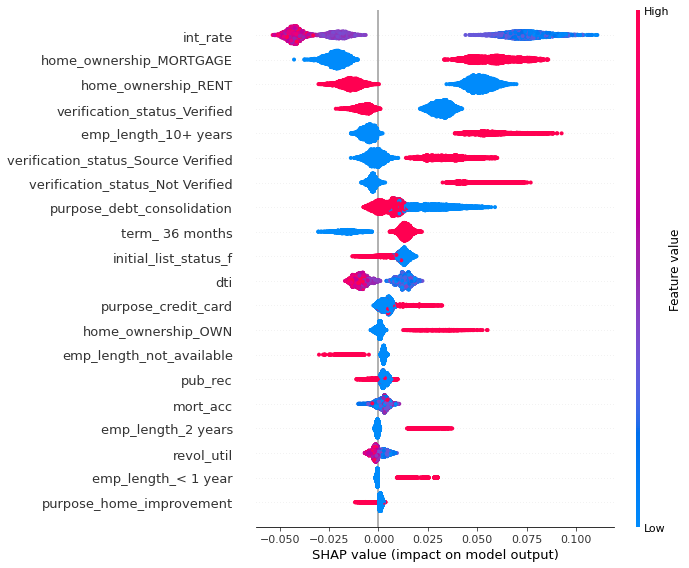

In [13]:
interpret_model(bestModel)

### Evaluate Model

In [14]:
evaluate_model(bestModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Area Under the Curve

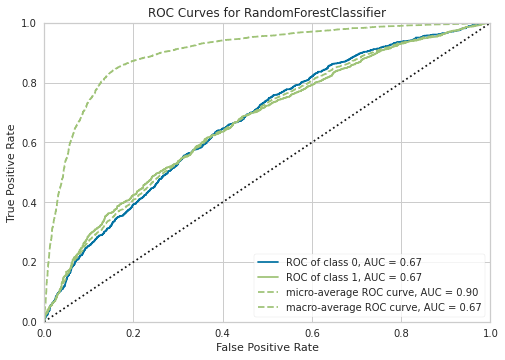

In [15]:
plot_model(bestModel, plot = 'auc')

#### Discrimination Threshold

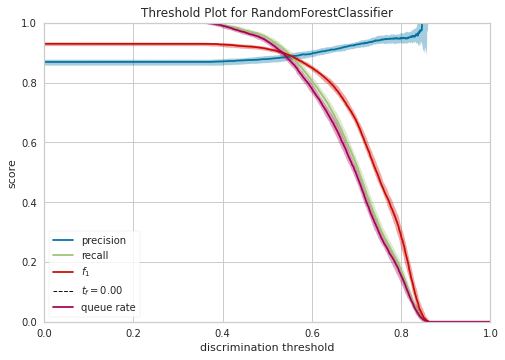

In [16]:
plot_model(bestModel, plot = 'threshold')

#### Precision Recall Curve

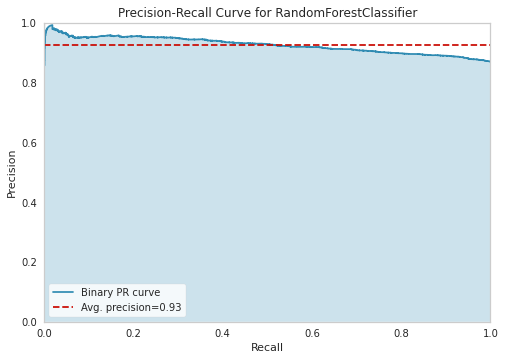

In [17]:
plot_model(bestModel, plot = 'pr')

#### Confusion Matrix

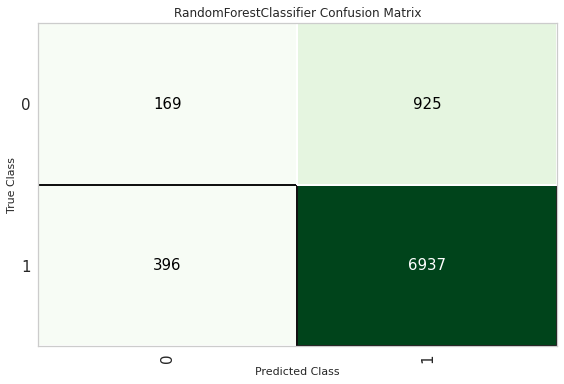

In [18]:
plot_model(bestModel, plot = 'confusion_matrix')

#### Class Prediction Error

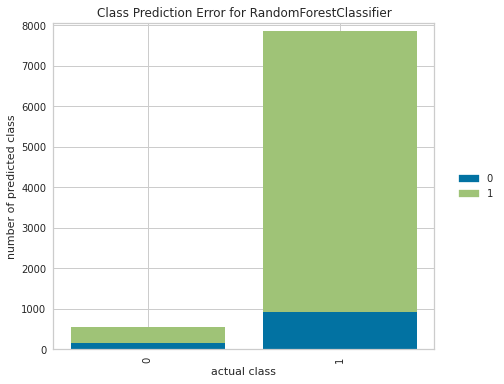

In [19]:
plot_model(bestModel, plot = 'error')

#### Classification Report

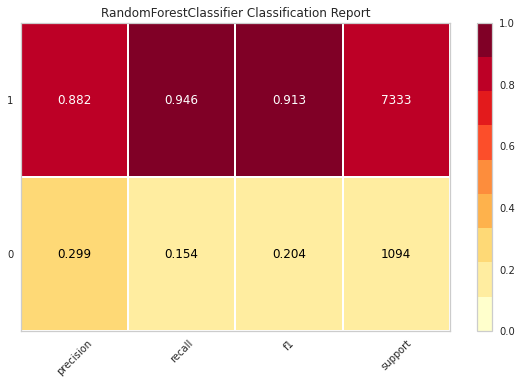

In [20]:
plot_model(bestModel, plot = 'class_report')

#### Decision Boundary

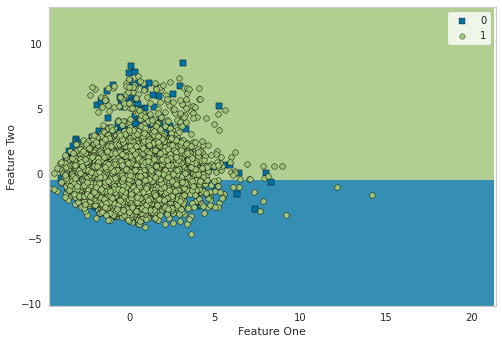

In [21]:
plot_model(bestModel, plot = 'boundary')

#### Recursive Feature Selection

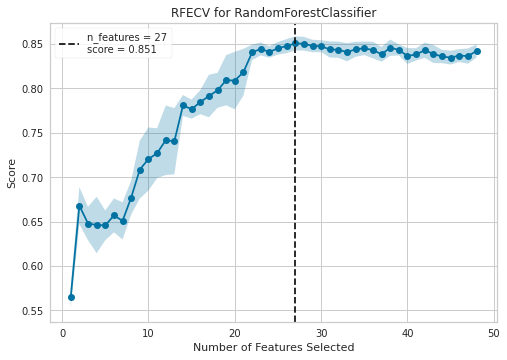

In [22]:
plot_model(bestModel, plot = 'rfe')

#### Learning Curve

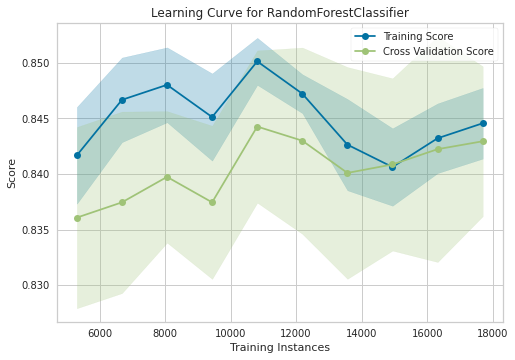

In [23]:
plot_model(bestModel, plot = 'learning')

#### Manifold Learning

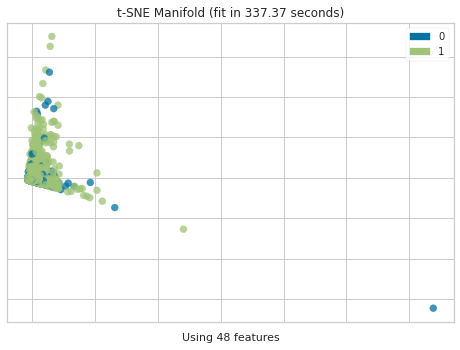

In [24]:
plot_model(bestModel, plot = 'manifold')

#### Calibration Curve

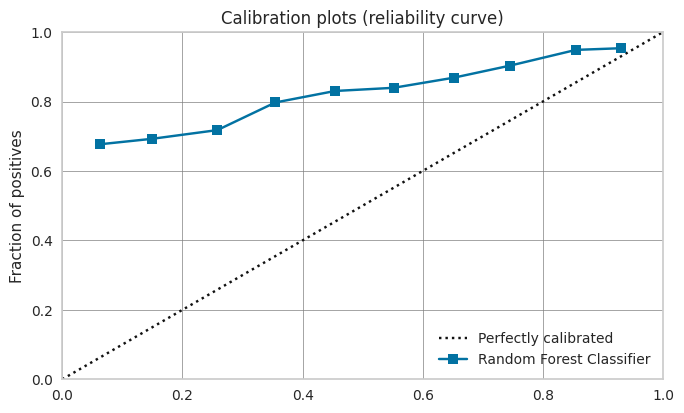

In [25]:
plot_model(bestModel, plot = 'calibration')

#### Validation Curve

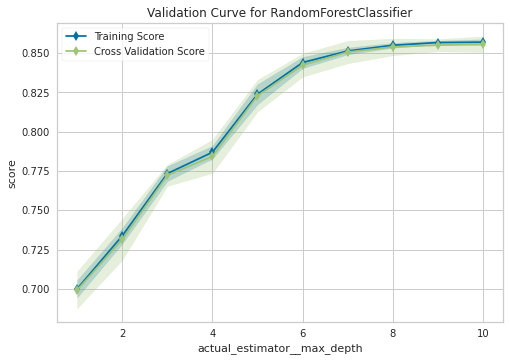

In [26]:
plot_model(bestModel, plot = 'vc')

#### Dimension Learning

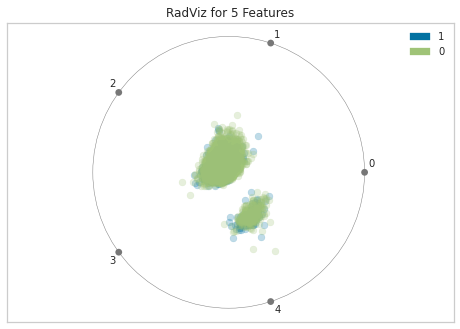

In [27]:
plot_model(bestModel, plot = 'dimension')

#### Feature Importance

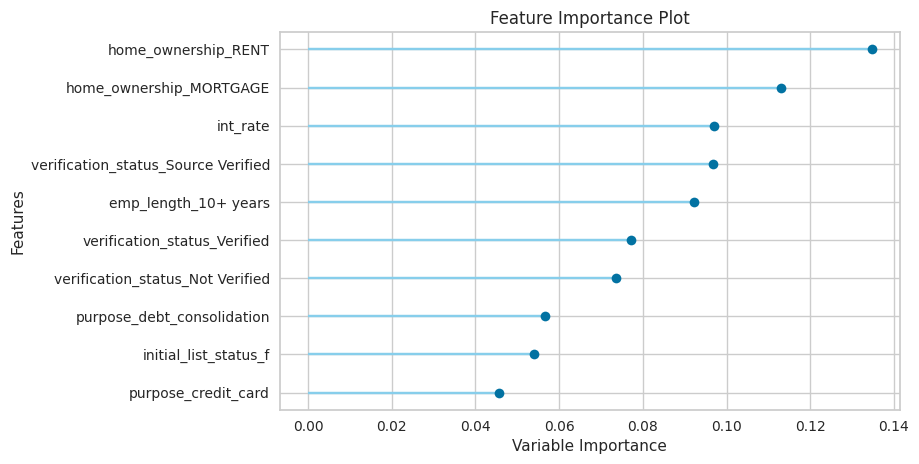

In [28]:
plot_model(bestModel, plot = 'feature')

#### Model Hyperparameter

In [29]:
plot_model(bestModel, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,{}
criterion,entropy
max_depth,6
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.002
min_impurity_split,None


### Predict on test / hold-out Sample

In [30]:
pred_holdout = predict_model(bestModel)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8432,0.6692,0.9460,0.8823,0.9131,0.1265,0.1350


### Save Model

In [31]:
save_model(bestModel, 'bestBaseModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='loan_status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=6, max_features='sqrt',
                                         max_le